In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from scipy.integrate import ode 
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from numpy import tan as tan
from scipy.interpolate import interp1d as sp_interp1d
from astropy import constants as const
from astropy import units as u
import math
from math import radians as radian
from numpy import linalg as LA
from scipy.special import ellipj
from numpy import e as e
from numpy import tan as tan


G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value

# customize the plot 
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)


plt.rcParams['xtick.major.width'] = 2

plt.rcParams['xtick.minor.width'] = 1

plt.rcParams['ytick.major.width'] = 2

plt.rcParams['ytick.minor.width'] = 1
plt.close()

# Free precession

In [4]:
def Eulerp(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
    taup,taua,tauc=tau(P,epsilon,Bp,k)
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3  
    
    du2=(1/taup * u1*u3 )/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup)/(1+epsilon)
    
    return [du1,du2,du3]

# Define timescale

In [5]:
def tau(P,eps,Bp,k):
    omega0=2*pi/P
    M=1.4*Ms
    R=10*km
    I0=0.4 * M * R**2
    m=1/2 * Bp * R**3
    taup=1/eps/omega0
    tauc=3*c**3*I0 / 2 / omega0**2 / m**2
    taua=2*R*omega0*tauc / 3 / k /c
    return taup, taua, tauc

# Consider the radiative torque

In [28]:
def Eulera(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3 + ((u3*cos(chi) + \
        u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))*(u2*cos(chi)\
        - u3*sin(chi)*sin(eta)))/taua 
    
    du2=(1/taup * u1*u3 + ((-(u1*cos(chi)) + \
        u3*cos(eta)*sin(chi))*(u3*cos(chi) + u1*cos(eta)*sin(chi) \
        + u2*sin(chi)*sin(eta)))/taua)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup+ sin(chi)*( \
        ((-(u2*cos(eta)) + u1*sin(eta))*\
        (u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta)))/taua))/(1+epsilon)

    
    return [du1,du2,du3]

In [29]:
theta=radian(30)
epsilon=1e-7
delta=0
P=2
Bp=4.4*1e13
k=0.6
chi=radian(10)
eta=radian(0)


period=P/epsilon/cos(theta)

taup,taua,tauc = tau(P,epsilon,Bp,k)
omegap=2*pi/P * epsilon *cos(theta)

t=np.linspace(0,4.1*period,10000)
tspan=[t[0],t[-1]]


u1=sin(theta)*cos(omegap*t)
u2=sin(theta)*sin(omegap*t)
u3=cos(theta)*cos(0*t)

d1=-(cos(theta)*sin(chi)* \
    (2*cos(chi)*cos(theta) + sin(chi)*sin(theta)))/ \
      (2.*omegap*taua)

d2=(2*sin(chi)**2*sin(theta)**2 + sin(2*chi)*sin(2*theta))/(4.*omegap*taua)



y0=[sin(theta)+d1,0,cos(theta)+d2]
sol=solve_ivp(Eulera,tspan,y0,t_eval=t,\
    args=(epsilon,delta,P,Bp,k,chi,eta),rtol=1e-8)

y1=-((cos(chi)*cos(theta)**2*sin(chi))/(omegap*taua)) - \
    (cos(omegap*t)/cos(theta)*sin(chi)**2*(11*sin(theta) + \
    7*sin(3*theta)))/(64.*omegap*taua) + \
    (cos(3*omegap*t)*sin(chi)**2*sin(theta)**2*tan(theta))/(16.*omegap*taua) + \
   (t*sin(omegap*t)*((1 + 3*cos(2*chi))*sin(2*theta) - \
        2*sin(chi)**2*sin(theta)**2*tan(theta)))/(8.*taua)

y2=(sin(chi)**2*sin(omegap*t)*sin(theta)**2*tan(theta))/(16.*omegap*taua) + \
       (sin(chi)**2*sin(3*omegap*t)*sin(theta)**2*tan(theta))/(16.*omegap*taua) + \
       (cos(omegap*t)*(-(t*(1 + 3*cos(2*chi))*sin(2*theta)) + \
                        2*t*sin(chi)**2*sin(theta)**2*tan(theta)))/(8.*taua)

y3=(2*cos(omegap*t)**2*sin(chi)**2*sin(theta)**2 + \
 cos(omegap*t)*sin(2*chi)*sin(2*theta))/(4.*omegap*taua)

In [30]:
theta=radian(30)
epsilon=1e-7
delta=0
P=2
Bp=4.4*1e13
k=0.6
chi=radian(10)
eta=radian(0)


period=P/epsilon/cos(theta)

taup,taua,tauc = tau(P,epsilon,Bp,k)
print(taup/taua)
omegap=2*pi/P * epsilon *cos(theta)

t1=np.linspace(0,-4.1*period,10000)
tspan=[t1[0],t1[-1]]


u10=sin(theta)*cos(omegap*t1)
u20=sin(theta)*sin(omegap*t1)
u30=cos(theta)*cos(0*t1)

d1=-(cos(theta)*sin(chi)* \
    (2*cos(chi)*cos(theta) + sin(chi)*sin(theta)))/ \
      (2.*omegap*taua)

d2=(2*sin(chi)**2*sin(theta)**2 + sin(2*chi)*sin(2*theta))/(4.*omegap*taua)



y0=[sin(theta)+d1,0,cos(theta)+d2]
sol0=solve_ivp(Eulera,tspan,y0,t_eval=t1,\
    args=(epsilon,delta,P,Bp,k,chi,eta),rtol=1e-8)

y10=-((cos(chi)*cos(theta)**2*sin(chi))/(omegap*taua)) - \
    (cos(omegap*t1)/cos(theta)*sin(chi)**2*(11*sin(theta) + \
    7*sin(3*theta)))/(64.*omegap*taua) + \
    (cos(3*omegap*t1)*sin(chi)**2*sin(theta)**2*tan(theta))/(16.*omegap*taua) + \
   (t1*sin(omegap*t1)*((1 + 3*cos(2*chi))*sin(2*theta) - \
        2*sin(chi)**2*sin(theta)**2*tan(theta)))/(8.*taua)

y20=(sin(chi)**2*sin(omegap*t1)*sin(theta)**2*tan(theta))/(16.*omegap*taua) + \
       (sin(chi)**2*sin(3*omegap*t1)*sin(theta)**2*tan(theta))/(16.*omegap*taua) + \
       (cos(omegap*t1)*(-(t1*(1 + 3*cos(2*chi))*sin(2*theta)) + \
                        2*t1*sin(chi)**2*sin(theta)**2*tan(theta)))/(8.*taua)

y30=(2*cos(omegap*t)**2*sin(chi)**2*sin(theta)**2 + \
 cos(omegap*t)*sin(2*chi)*sin(2*theta))/(4.*omegap*taua)

0.002901758523584714


In [31]:
print(taup,taua/taup,tauc/taup)

3183098.8618379068 344.6186138068583 2959729.838586537


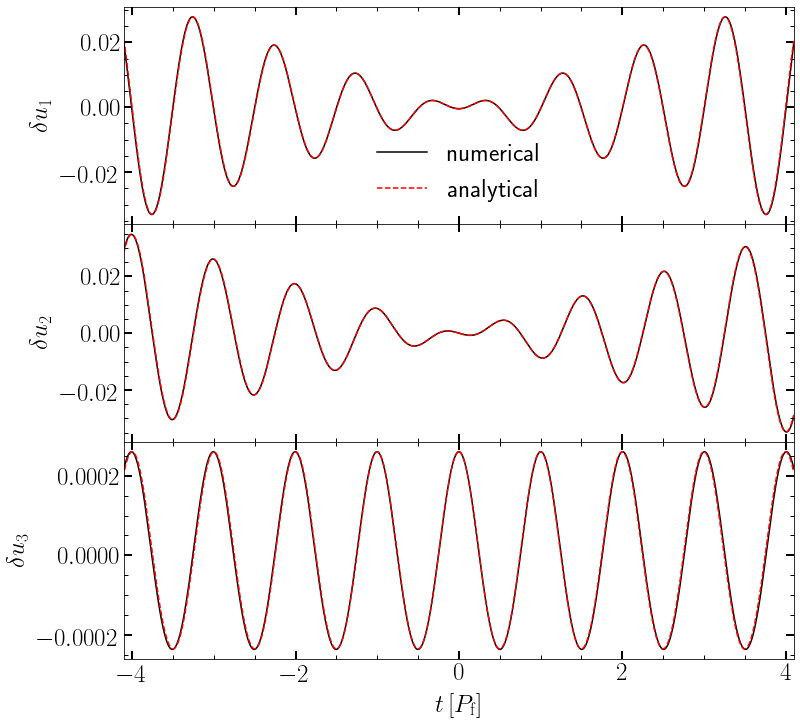

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(hspace=0)
ax1.plot(t/period,(sol.y[0,:]-u1),color='k',label='numerical')
ax1.plot(t1/period,(sol0.y[0,:]-u10),color='k')
ax1.plot(t/period,y1,color='r',linestyle='dashed',label='analytical')
ax1.plot(t1/period,y10,color='r',linestyle='dashed')
ax1.set_xlim(-4*period,4*period)

ax2.plot(t/period,(sol.y[1,:]-u2),color='k')
ax2.plot(t1/period,(sol0.y[1,:]-u20),color='k')
ax2.plot(t/period,y2,color='r',linestyle='dashed')
ax2.plot(t1/period,y20,color='r',linestyle='dashed')
ax2.set_xlim(-4*period,4*period)

ax3.plot(t/period,(sol.y[2,:]-u3),color='k')
ax3.plot(t1/period,(sol0.y[2,:]-u30),color='k')
ax3.plot(t/period,y3,color='r',linestyle='dashed')
ax3.plot(t1/period,y30,color='r',linestyle='dashed')
ax3.set_xlim(-4.1,4.1)

ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()

ax1.set_ylabel('$\delta u_{1}$',fontsize=25)
ax2.set_ylabel('$\delta u_{2}$',fontsize=25)
ax3.set_ylabel('$\delta u_{3}$',fontsize=25)
ax3.set_xlabel(r'$ t\,[P_{\rm f}]$',fontsize=25)
ax1.legend(fontsize=25,frameon=False)
plt.savefig('/Users/yonggao/desktop/anomalous.pdf',format='pdf')

# Consider the spin down torque

In [17]:
def Eulerc(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
    u1=y[0]; u2=y[1]; u3=y[2]
    
   
    du1=-1/(1+delta)/taup * u2*u3  -(u1**2 + u2**2 + u3**2)*\
        (-(cos(eta)*sin(chi)*(u3*cos(chi)\
        +u2*sin(chi)*sin(eta)))\
        +u1*(cos(chi)**2 + sin(chi)**2*sin(eta)**2))/tauc
    
    du2=(1/taup * u1*u3  - (u1**2 + u2**2 + u3**2)*\
         (u2*(cos(chi)**2 +cos(eta)**2*sin(chi)**2) - \
         u3*cos(chi)*sin(chi)*sin(eta) - \
         u1*cos(eta)*sin(chi)**2*sin(eta))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup + sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc ))/(1+epsilon)
    
    return [du1,du2,du3]

In [18]:
def Eulerc(t,y,epsilon,delta,P,Bp,k,chi,eta):
    
    taup,taua,tauc=tau(P,epsilon,Bp,k)
    u1=y[0]; u2=y[1]; u3=y[2]
    
    du1=-1/(1+delta)/taup * u2*u3  + ((u1**2 + u2**2 + u3**2)*\
        (-u1 + cos(eta)*sin(chi)*(u3*cos(chi) \
        + u1*cos(eta)*sin(chi) + u2*sin(chi)*sin(eta))))/tauc
    
    du2=(1/taup * u1*u3  + ((u1**2 + u2**2 + u3**2)*(-u2 \
        + sin(chi)*sin(eta)*(u3*cos(chi) + u1*cos(eta)*sin(chi) + \
        u2*sin(chi)*sin(eta))))/tauc)/(1+epsilon*delta/(1+delta))
    
    du3=(-u1*u2*delta/(1+delta)/taup + sin(chi)*(((u1**2 + u2**2 + u3**2)*\
        (u1*cos(chi)*cos(eta) - u3*sin(chi) + \
        u2*cos(chi)*sin(eta)))/tauc ))/(1+epsilon)
    
    return [du1,du2,du3]

In [19]:
theta=radian(30)
epsilon=1e-7
delta=0
P=2
Bp=4.4*1e13
k=0.6
chi=radian(10)
eta=radian(0)


period=P/epsilon/cos(theta)

taup,taua,tauc = tau(P,epsilon,Bp,k)
omegap=2*pi/P * epsilon *cos(theta)

t=np.linspace(0,4.1*period,10000)
tspan=[t[0],t[-1]]


u1=sin(theta)*cos(omegap*t)
u2=sin(theta)*sin(omegap*t)
u3=cos(theta)*cos(0*t)

d1= ((1 + 3*cos(2*theta))/cos(theta)*sin(2*chi))/(8.*omegap*tauc) + \
      (sin(chi)**2*sin(theta))/(2.*omegap*tauc) - \
      (sin(2*chi)*sin(theta)*tan(theta))/(4.*omegap*tauc)


y0=[sin(theta),d1,cos(theta)]
sol=solve_ivp(Eulerc,tspan,y0,t_eval=t,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8,atol=1e-10)

y1= -(t*(3 + cos(2*chi))*cos(omegap*t)*sin(theta))/(4.*tauc) + \
       (omegap*t**2*sin(chi)**2*sin(omegap*t)*sin(theta))/(2.*tauc) + \
      (sin(2*chi)*sin(2*omegap*t)*sin(theta)*tan(theta))/(4.*omegap*tauc)

y2= ((1 + 3*cos(2*theta))/cos(theta)*sin(2*chi))/(8.*omegap*tauc) - \
       ((-1 + omegap**2*t**2)*cos(omegap*t)*sin(chi)**2*sin(theta))/ \
        (2.*omegap*tauc) - (t*(3 + cos(2*chi))*sin(omegap*t)*sin(theta))/(4.*tauc) - \
      (cos(2*omegap*t)*sin(2*chi)*sin(theta)*tan(theta))/(4.*omegap*tauc)

y3=  -((t*cos(theta)*sin(chi)**2)/tauc) + \
       (cos(chi)*sin(chi)*sin(omegap*t)*sin(theta))/(omegap*tauc)

In [20]:
theta=radian(30)
epsilon=1e-7
delta=0
P=2
Bp=4.4*1e13
k=0.6
chi=radian(10)
eta=radian(0)


period=P/epsilon/cos(theta)

taup,taua,tauc = tau(P,epsilon,Bp,k)
omegap=2*pi/P * epsilon *cos(theta)

t1=np.linspace(0,-4.1*period,10000)
tspan=[t1[0],t1[-1]]


u10=sin(theta)*cos(omegap*t1)
u20=sin(theta)*sin(omegap*t1)
u30=cos(theta)*cos(0*t1)

d1= ((1 + 3*cos(2*theta))/cos(theta)*sin(2*chi))/(8.*omegap*tauc) + \
      (sin(chi)**2*sin(theta))/(2.*omegap*tauc) - \
      (sin(2*chi)*sin(theta)*tan(theta))/(4.*omegap*tauc)


y0=[sin(theta),d1,cos(theta)]
sol0=solve_ivp(Eulerc,tspan,y0,t_eval=t1,args=(epsilon,delta,P,Bp,k,chi,eta),method='DOP853',rtol=1e-8,atol=1e-10)
# sol0=solve_ivp(Eulerc,tspan,y0,t_eval=t1,args=(epsilon,delta,P,Bp,k,chi,eta),rtol=1e-7)
y10= -(t1*(3 + cos(2*chi))*cos(omegap*t1)*sin(theta))/(4.*tauc) + \
       (omegap*t1**2*sin(chi)**2*sin(omegap*t1)*sin(theta))/(2.*tauc) + \
      (sin(2*chi)*sin(2*omegap*t1)*sin(theta)*tan(theta))/(4.*omegap*tauc)

y20= ((1 + 3*cos(2*theta))/cos(theta)*sin(2*chi))/(8.*omegap*tauc) - \
       ((-1 + omegap**2*t**2)*cos(omegap*t1)*sin(chi)**2*sin(theta))/ \
        (2.*omegap*tauc) - (t1*(3 + cos(2*chi))*sin(omegap*t1)*sin(theta))/(4.*tauc) - \
      (cos(2*omegap*t1)*sin(2*chi)*sin(theta)*tan(theta))/(4.*omegap*tauc)

y30=  -((t1*cos(theta)*sin(chi)**2)/tauc) + \
       (cos(chi)*sin(chi)*sin(omegap*t1)*sin(theta))/(omegap*tauc)

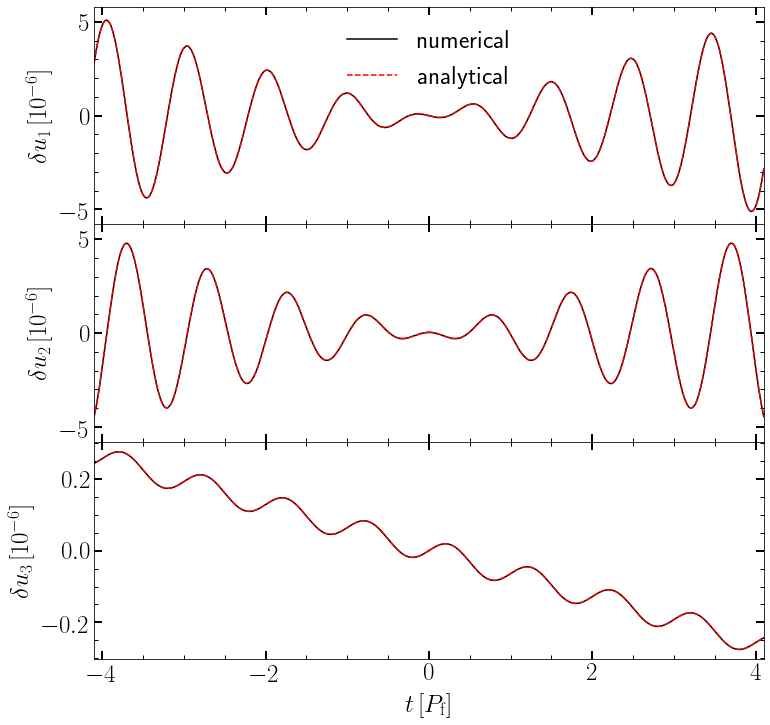

In [27]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(12,12))
plt.subplots_adjust(hspace=0)
ax1.plot(t/period,(sol.y[0,:]-u1)/1e-6,color='k',label='numerical')
ax1.plot(t1/period,(sol0.y[0,:]-u10)/1e-6,color='k')
ax1.plot(t/period,y1/1e-6,color='r',linestyle='dashed',label='analytical')
ax1.plot(t1/period,y10/1e-6,color='r',linestyle='dashed')
ax1.set_xlim(-4*period,4*period)

ax2.plot(t/period,(sol.y[1,:]-u2)/1e-6,color='k')
ax2.plot(t1/period,(sol0.y[1,:]-u20)/1e-6,color='k')
ax2.plot(t/period,y2/1e-6,color='r',linestyle='dashed')
ax2.plot(t1/period,y20/1e-6,color='r',linestyle='dashed')
ax2.set_xlim(-4*period,4*period)

ax3.plot(t/period,(sol.y[2,:]-u3)/1e-6,color='k')
ax3.plot(t1/period,(sol0.y[2,:]-u30)/1e-6,color='k')
ax3.plot(t/period,y3/1e-6,color='r',linestyle='dashed')
ax3.plot(t1/period,y30/1e-6,color='r',linestyle='dashed')
ax3.set_xlim(-4.1,4.1)
ax1.set_ylim(-5.8,5.8)
ax2.set_ylim(-5.8,5.8)
ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()

ax1.set_ylabel('$\delta u_{1}\,[10^{-6}]$',fontsize=25)
ax2.set_ylabel('$\delta u_{2}\,[10^{-6}]$',fontsize=25)
ax3.set_ylabel('$\delta u_{3}\,[10^{-6}]$',fontsize=25)
ax3.set_xlabel(r'$ t\,[P_{\rm f}]$',fontsize=25)
ax1.legend(fontsize=25,frameon=False)
plt.savefig('/Users/yonggao/desktop/spindown.pdf',format='pdf')

# Add two torques